###### ECE 283: Homework 1
###### Topics: Classification using logistic regression
###### Assigned: Wednesday April 4
###### Due: Monday April 16
----------------------------------------

## 1. Generate 2D Gaussian distribution


Generated distribution of Class 0 & 1 with the given mean and covariance (using eigen value,vector pair)

In [1]:
import numpy as np 
from math import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import norm
from IPython.display import Image, display, Math, Latex

# this allows plots to appear directly in the notebook
%matplotlib inline
%config IPCompleter.greedy=True

# Params
n_inpoints = 100

# Functions 

#### Class 0

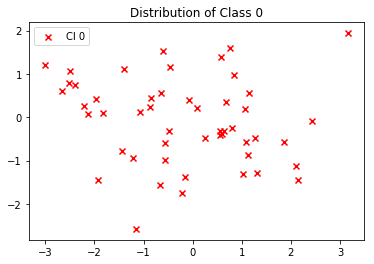

In [2]:
def generateClass0():
    theta0 = 0
    lmb01 = 2
    lmb02 = 1
    m0 = (0,  0)
    # computing u * u.T and later multiplying with lambda
    cov01 = [[(cos(theta0))**2,    cos(theta0)*sin(theta0)], 
             [(sin(theta0))*cos(theta0), (sin(theta0))**2]]
    cov02 = [[(sin(theta0))**2,    -(cos(theta0)*sin(theta0))], 
             [-(cos(theta0)*sin(theta0)), (cos(theta0))**2]]
    cov0 = lmb01*np.matrix(cov01) + lmb02*np.matrix(cov02)
    cov0_det = np.linalg.det(cov0)
    x0, y0 = np.random.multivariate_normal(m0, cov0, int(n_inpoints/2)).T
    return x0,y0

x0, y0 = generateClass0()
plt.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
plt.legend()    
plt.title('Distribution of Class 0')
plt.show()

#### Class 1 (Mixture A & B)

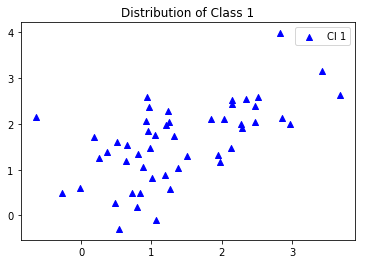

In [3]:
def generateClass1():
    # Mixture A
    theta1a = -3*pi/4
    lmb1a1 = 2
    lmb1a2 = 1/4
    m1a = (-2, 1)
    cov1a = [[(cos(theta1a))**2,    cos(theta1a)*sin(theta1a)], 
             [(sin(theta1a))*cos(theta1a), (sin(theta1a))**2]]
    cov2a = [[(sin(theta1a))**2,    -(cos(theta1a)*sin(theta1a))], 
             [-(cos(theta1a)*sin(theta1a)), (cos(theta1a))**2]]
    cov1a = lmb1a1*np.matrix(cov1a) + lmb1a2*np.matrix(cov2a)
    cov1a_det = np.linalg.det(cov1a)
    x1a, y1a = np.random.multivariate_normal(m1a, cov1a, int(n_inpoints/2)).T
    #print('Shape: ',x1a.shape,', ',y1a.shape,', ',cov1a)

    # Mixture B
    theta1b = pi/4
    lmb1b1 = 3
    lmb1b2 = 1
    m1b = (3, 2)
    cov1b = [[(cos(theta1b))**2,    cos(theta1b)*sin(theta1b)], 
             [(sin(theta1b))*cos(theta1b), (sin(theta1b))**2]]
    cov2b = [[(sin(theta1b))**2,    -(cos(theta1b)*sin(theta1b))], 
             [-(cos(theta1b)*sin(theta1b)), (cos(theta1b))**2]]
    cov1b = lmb1b1*np.matrix(cov1b) + lmb1b2*np.matrix(cov2b)
    cov1b_det = np.linalg.det(cov1b)
    x1b, y1b = np.random.multivariate_normal(m1b, cov1b, int(n_inpoints/2)).T
    #print('Shape: ',x1b.shape,', ',y1b.shape,', ',cov1b)

    # Class 1 (A * 0.33 +B * 0.66)
    y1 = np.array(y1a)* (1 / 3)+np.array(y1b)* (2 / 3)
    x1 = np.array(x1a)* (1 / 3)+np.array(x1b)* (2 / 3)
    return x1,y1

x1, y1 = generateClass1()    
plt.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
plt.title('Distribution of Class 1')
plt.legend()    
plt.show()

#### Combined plot 

Shape; X: (100,) , Y: (100,)


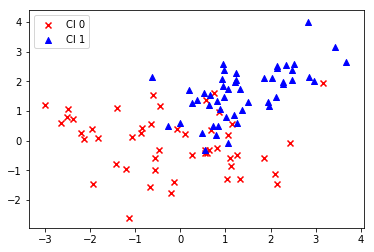

In [4]:
x = np.concatenate((x0, x1))
y = np.concatenate((y0, y1))
print('Shape; X:',x.shape,', Y:',y.shape)
plt.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
plt.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
plt.legend()    
plt.show()

c0 = np.vstack((x0, y0)).T
c1 = np.vstack((x1, y1)).T
# ----------------------------------------
# Set up the [xi, yi] training data vector
# ----------------------------------------
X = np.concatenate((c0,c1), axis = 0)
Y = np.array([0]*int(n_inpoints/2) + [1]*int(n_inpoints/2)).reshape(n_inpoints,1)

## 2. MAP 

- Compute log likelihoods as log((pdf y1)/(pdf y0)) > 0 ===> [Class1]

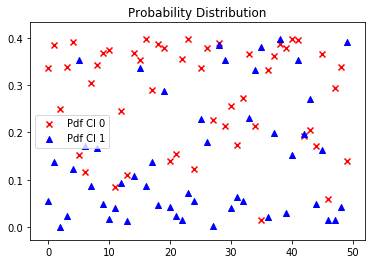

In [5]:
# Take the log likelihood based on the generated data
y0_ll = norm.pdf(y0)
y1_ll = norm.pdf(y1)
y_ll = np.log2(y1_ll / y0_ll) 

# Printing PDF Y0 and Y1 
freex = np.arange(0, int(n_inpoints/2), 1)
plt.scatter(freex, y0_ll, color = 'r',marker='x', label = 'Pdf Cl 0')
plt.scatter(freex, y1_ll, color = 'b',marker='^', label = 'Pdf Cl 1')
#plt.scatter(freex, z_ll, color = 'y',marker='o', label = 'Cl 1')
plt.title('Probability Distribution')
plt.legend() 
plt.show()

In [6]:
zx_ll = []
zy_ll = []
# Obtain decision boundary around 0
idx = 0
for xl in y_ll:
    # Compare with 0 (+- 0.5)
    if xl < 0.5 and xl > -0.5:       
        zy_ll.append(y[idx])
        zx_ll.append(x[idx])
    idx = idx+1
# Taking first two points: ==> FIX ME
# need a slope and c to fix the position of line
slope = (zy_ll[0]-zy_ll[1]) / (zx_ll[0]-zx_ll[1])
c = zy_ll[0] - slope * zx_ll[0]
print(c, slope)

# Estimating the mean vector. 
# Not used right now
combined = np.vstack((x, y)).T
muMle = np.mean(combined)
print('MLE')
print('u:', muMle)
covMle = np.cov(x,y)
print('C:', covMle)

-0.4330345617661728 -0.2290170338321216
MLE
u: 0.6809932744531975
C: [[2.14997676 0.80894144]
 [0.80894144 1.57792195]]


Shape; X: (100,) , Y: (100,)


C:\Users\Karma\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 3000.
  warnings.warn(errors[info][0], RuntimeWarning)


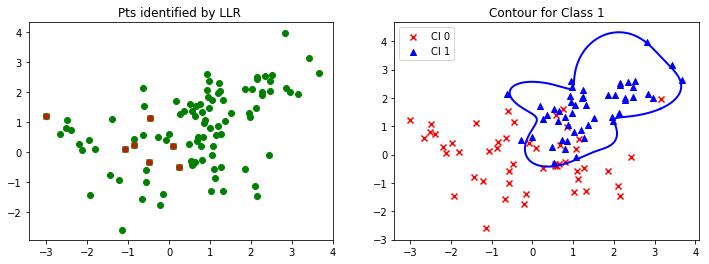

In [7]:
from numpy import sin, cos, pi
from scipy.optimize import leastsq
# Contour drawing helper function
def find_boundary(x, y, n, plot_pts=1000):

    def sines(theta):
        ans = np.array([sin(i*theta)  for i in range(n+1)])
        return ans

    def cosines(theta):
        ans = np.array([cos(i*theta)  for i in range(n+1)])
        return ans

    def residual(params, x, y):
        x0 = params[0]
        y0 = params[1]
        c = params[2:]

        r_pts = ((x-x0)**2 + (y-y0)**2)**0.5

        thetas = np.arctan2((y-y0), (x-x0))
        m = np.vstack((sines(thetas), cosines(thetas))).T
        r_bound = m.dot(c)

        delta = r_pts - r_bound
        delta[delta>0] *= 10

        return delta

    # initial guess for x0 and y0
    x0 = x.mean()
    y0 = y.mean()

    params = np.zeros(2 + 2*(n+1))
    params[0] = x0
    params[1] = y0
    params[2:] += 1000

    popt, pcov = leastsq(residual, x0=params, args=(x, y), ftol=1.e-12, xtol=1.e-12)

    thetas = np.linspace(0, 2*pi, plot_pts)
    m = np.vstack((sines(thetas), cosines(thetas))).T
    c = np.array(popt[2:])
    r_bound = m.dot(c)
    x_bound = x0 + r_bound*cos(thetas)
    y_bound = y0 + r_bound*sin(thetas)

    return x_bound, y_bound

# plot
def plotDistrib():
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
    print('Shape; X:',x.shape,', Y:',y.shape)
    ax1.scatter(x, y, color = 'g',marker='o', label = 'Cl Unknown')
    ax1.scatter(zx_ll, zy_ll, color = 'r',marker='x', label = 'Lin Cl')
    ax1.set_title("Pts identified by LLR ")
    xb0, yb0 = find_boundary(x0, y0, 5)

    xb1, yb1 = find_boundary(x1, y1, 5)
    ax2.plot(xb1, yb1, '-b', lw=2.)
    ax2.set_title("Contour for Class 1")
    ax2.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
    ax2.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
    ax2.legend()  

# Plot the distribution
plotDistrib()

C:\Users\Karma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


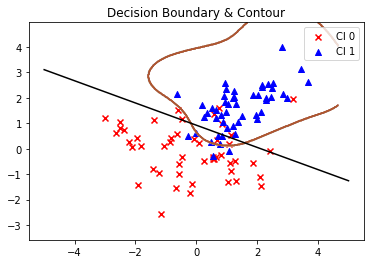

In [8]:
import scipy
from sklearn import svm

def plotDecisionLine(X, Y):
    C = 1.0  # SVM regularization parameter
    clf = svm.SVC(kernel = 'linear',  gamma=0.7, C=C )
    clf.fit(X, Y)
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    return xx, yy, clf

def plotBoundary():
    fig = plt.figure()
    plt.scatter(x0,y0,c = 'red', marker='x' , label = 'Cl 0' )
    plt.scatter(x1,y1, c= 'blue', marker='^' , label = 'Cl 1')
    # ------------ 
    xxl, yyl, clf = plotDecisionLine(X, Y)
    plt.plot(xxl, yyl, 'k-')
    # ------------ 
    C = 1.0  # SVM regularization parameter
    clf = svm.SVC(kernel = 'rbf',  gamma=0.7, C=C )
    clf.fit(X, Y)

    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.legend()
    plt.title("Decision Boundary & Contour")
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    return xxl, yyl

# Plot the boundary/contour
xx, yy = plotBoundary()

## 3. Estimate the conditional probability of incorrect classification

- Compute the decision line eqn obtained in previous question
- Verify whether the points are correctly classified by this line
- Using the incorrectly classified count obtain the probability of error

In [9]:
bad_c0 = 0
bad_c1 = 0
def decisionLine(x,y,m,c):
    val = y - (m*x + c)
    if(val<0):
        return 1
    elif(val>0):
        return 0
    else:
        return -1

#equation of decision line
m = (yy[1]-yy[0])/(xx[1]-xx[0])
print('Decision Line Slope: ',m)
c = yy[1] - m*xx[1]
print('Decision Line intercept: ',c)
for i in range(0,int(n_inpoints/2)):
    if(decisionLine(X[i][0],X[i][1],m,c) == 0):
        bad_c0 = bad_c0+1
for i in range(int(n_inpoints/2),n_inpoints):
    if(decisionLine(X[i][0],X[i][1],m,c) == 1):
        bad_c1 = bad_c1+1
print('')
#Number of points mis-classified        
Perror_c0 = bad_c0/(n_inpoints/2)
Perror_c1 = bad_c1/(n_inpoints/2)
print('Conditional Probability of Error')
print('Prob error_c0, Prob error_c1 : ',Perror_c0, Perror_c1)
print('Count error_c0, Count error_c1 : ',bad_c0, bad_c1)

Decision Line Slope:  -0.43729215905600105
Decision Line intercept:  0.9250694106315436

Conditional Probability of Error
Prob error_c0, Prob error_c1 :  0.16 0.16
Count error_c0, Count error_c1 :  8 8


## 4. Using a Gaussian kernel k(x; x0) = exp ((x − x0)2=2‘2), apply kernelized logistic regression with Newton’s method to find a classifier

#### a. Compute y_hat
- Compute the kernel K from feature vector X
- thereafter compute zi using the kernel function and initial 'a'
- Compute y_hat from the sigmoid of zi

#### b. Compute the gradient of loss function
- DeltaE: gradient of loss function w.r.t a
- compute Hessian matrix
#### c.  update rule to update the weight vector


You will need to play with the
hyperparameter ‘. For the Newton iterations, note that you may either process the entire data
set, or use the data sequentially in smaller batches (or even one data point at a time). (Do some
digging on your own to find out what the best practices are.) Comment on what is the smallest
N you can get away with, as well as the number of iterations you needed to run for convergence


### Observations

- As the number of points increases we have to decrease the value of 'l' in order to get an optimal classification
- If we keep the value of 'l' constant then at high number of input data points we see high probability of error
- In case of Newton iterations we ran for the entire batch
- To converge we had to run around 100 iterations beyond which the value of 'a' remains constant. The best practise suggests that we create batches and run iterations. We also evaluate loss or cross entropy to check for convergence.
- In this case we were able to see convergence at around 95-100 iterations.



In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def krnl(xs, ys, sigma=1,l=1):
    dx = xs-ys
    k = (np.exp((dx)**2))/(2*(l**2))
    return k

a = np.zeros((1,n_inpoints))
k = np.zeros((100, 100))
diag_R = np.zeros((100, 100))
for i in range(0,100):
    for j in range(0,100):
        k[i][j] = krnl(X[i][1],X[j][1])
        
y_hat = np.array([sigmoid(np.matmul(a,k[:,i]))  for i in range(0,100)])
#print(Y.shape)
y_hat = np.matrix(Y-y_hat)
deltaE = np.matmul(k,y_hat)

diag_R = y_hat #just for declaration
for i in range(0,100):
    diag_R[i] = y_hat[i][0]*(1-y_hat[i][0])
diag_R = diag_R.flatten()
diag_R = np.array(diag_R)
diagonalR_matrix = np.diag(diag_R[0])
H = np.matmul(k,diagonalR_matrix)
H = np.matmul(H,k)
inv_H = np.linalg.inv(H)

# update rule to update the weight vector
a_T = a.T
for i in range (0,100):
    a_T = a_T - np.matmul(inv_H,deltaE)
print(a_T.shape)

(100, 1)


In [14]:
def newClassifier(new_x):
    new_k = np.zeros((n_inpoints, 1))
    z = 0 #decision for new entry
    for i in range(0,n_inpoints):
        new_k[i][0] = krnl(X[i][1],new_x)
    z = np.matmul(a_T.T,new_k)
    return z

# Test based on the updated decision variable
new_x = 13.5
new_z = newClassifier(new_x)
#prob 1/(1+exp(-z))
print(new_z[0])
print(np.exp(-9.77052954))

[[-1.56584401e+103]]
5.711010195786028e-05


## 5. Plot the training data points and show the decision boundaries
- We dont see any overfitting and hence avoided going for l2 regularization.

C:\Users\Karma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


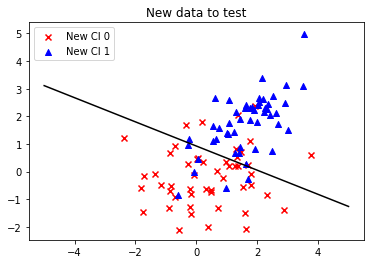

0.25720316845820246


C:\Users\Karma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [15]:

# Generate new X,Y using the gaussian distribution at the start
new_x0, new_y0 = generateClass0()
new_x1, new_y1 = generateClass1()  
new_c0 = np.vstack((x0, y0)).T
new_c1 = np.vstack((x1, y1)).T
new_X = np.concatenate((new_c0,new_c1), axis = 0)
new_Y = np.array([0]*int(n_inpoints/2) + [1]*int(n_inpoints/2)).reshape(n_inpoints,1)
plt.scatter(new_x0, new_y0, color = 'r',marker='x', label = 'New Cl 0')
plt.scatter(new_x1, new_y1, color = 'b',marker='^', label = 'New Cl 1')
# Plot the boundary
new_xx, new_yy, clf = plotDecisionLine(new_X, new_Y)
plt.plot(new_xx, new_yy, 'k-')
plt.legend()    
plt.title('New data to test')
plt.show()

# Use the above code to figure out the class the elements of newly generated values belong to 
print(new_X[1,1])
new_z = np.array([newClassifier(new_X[i,1]) for i in range(0, n_inpoints)])
new_z = sigmoid(new_z.flatten())
new_z[new_z <= 0.5] = 0
new_z[new_z >  0.5] = 1 # Set Class 1 for greater than 0.5
#print(new_z)


## 6. Conditional probability of incorrect classification for each class

In [13]:
new_bad_c0 = 0
new_bad_c1 = 0
#equation of decision line
new_m = (new_yy[1]-new_yy[0])/(new_xx[1]-new_xx[0])
print(new_m)
new_c = new_yy[1] - new_m*new_xx[1]
print(new_c)

for i in range(0,int(n_inpoints/2)):
    if(decisionLine(new_X[i][0],new_X[i][1],new_m,new_c) == 0):
        new_bad_c0 = new_bad_c0+1
for i in range(int(n_inpoints/2),n_inpoints):
    if(decisionLine(new_X[i][0],new_X[i][1],new_m,new_c) == 1):
        new_bad_c1 = new_bad_c1+1

#Number of points mis-classified        
print(new_bad_c0,new_bad_c1)
new_Perror_c0 = new_bad_c0/(n_inpoints/2)
new_Perror_c1 = new_bad_c1/(n_inpoints/2)
print('New Conditional Probability of Error')
print('Perror_c0, Perror_c1 : ',new_Perror_c0, new_Perror_c1)

-0.43729215905600105
0.9250694106315436
8 8
New Conditional Probability of Error
Perror_c0, Perror_c1 :  0.16 0.16
